## Basics of Time Series

#### Definition:

- A sequence of observations ordered in time.

- Example: Daily closing price of TCS stock.

#### Components:

- Trend (T): Long-term increase or decrease.

- Seasonality (S): Repeating pattern.

- Cyclic (C): Long-term oscillations.

- Residual/Noise (R): Random fluctuations.

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

<center><h4> Additive form:</h4></center> 

$$Y_t = T_t + S_t + C_t + R_t$$

<center><h4> Multiplicative form:</h4></center>

$$Y_t = T_t \times S_t \times C_t \times R_t$$

### Stationarity

A time series is stationary if its mean, variance, and covariance are constant over time.

### Use:

#### Augmented Dickey–Fuller (ADF) test.

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

#### mean
$$E[Yt​]=μ$$

#### Variance
$$Var(Yt​)=σ2$$

#### Covariance
$$Cov(Yt​,Yt+h​)=γ(h)$$

<center>

### Time Series Decomposition

</center>

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

<center><h3>Autocorrelation & Partial Autocorrelation</h3></center>

Measures correlation between observations at different lags.

$$r_k = \frac{\sum_t (Y_t - \bar{Y})(Y_{t-k} - \bar{Y})}{\sum_t (Y_t - \bar{Y})^2}$$

Used to identify AR/MA order.

<center><h3>📘 D. Models</h3></center>

<center><h4>AR (AutoRegressive):</h4></center>

$$Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \epsilon_t$$

<center><h4>MA (Moving Average):</h4></center>

$$Y_t = \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \epsilon_t$$

<center><h4>ARIMA(p,d,q):</h4></center>

Combines AR and MA with differencing (d) to remove trends.

$$(1 - \sum_{i=1}^p \phi_i L^i)(1 - L)^d Y_t = (1 + \sum_{i=1}^q \theta_i L^i)\epsilon_t$$

<center><h4>SARIMA:</h4></center>

Adds seasonality terms (P,D,Q,s).

<center><h4>LSTM / RNN:</h4></center>

Neural networks capturing long-term dependencies.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')



[*********************100%***********************]  1 of 1 completed


<Figure size 1000x500 with 0 Axes>

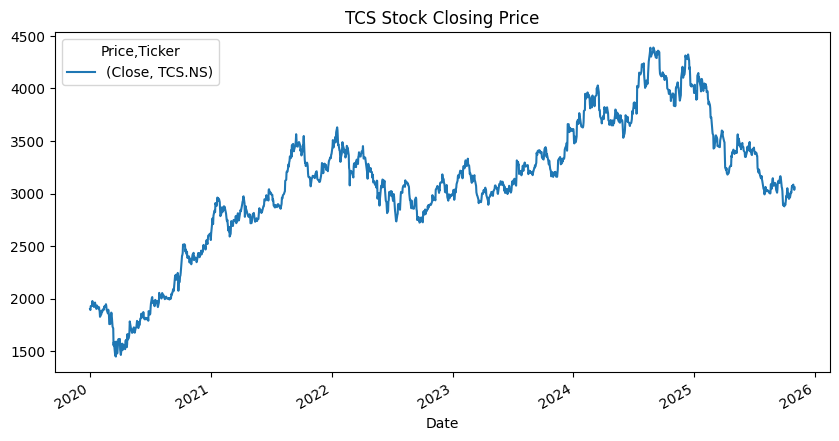

In [92]:
data = yf.download('TCS.NS', start='2020-01-01', end='2025-11-01')
data = data[['Close']]
data.plot(title='TCS Stock Closing Price', figsize=(10,5))
plt.show()


<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

<center><h3>Augmented Dickey-Fuller (ADF) Test Interpretation</h3></center>

The ADF test checks for <strong>stationarity</strong> in time series data.

<center><h4>📊 Hypothesis Testing:</h4></center>

- <strong>Null Hypothesis (H₀)</strong>: Series has a unit root (non-stationary)
- <strong>Alternative Hypothesis (H₁)</strong>: Series is stationary

<center><h4>🔍 Key Outputs to Check:</h4></center>

<strong>1. Test Statistic vs Critical Values:</strong>
$$ \text{Test Statistic} < \text{Critical Value} \Rightarrow \text{Reject H₀} $$

<strong>2. p-value Interpretation:</strong>
- <strong>p-value < 0.05</strong>: Reject H₀ (Stationary) ✅
- <strong>p-value ≥ 0.05</strong>: Fail to reject H₀ (Non-stationary) ❌

<center><h4>🎯 Decision Guide:</h4></center>

<table border="1">
<tr><th>Condition</th><th>Interpretation</th><th>Action</th></tr>
<tr><td>p-value < 0.05<br>Test Statistic < Critical Values</td><td>Stationary ✅</td><td>No differencing needed</td></tr>
<tr><td>p-value ≥ 0.05<br>Test Statistic > Critical Values</td><td>Non-stationary ❌</td><td>Apply differencing (d > 0)</td></tr>
</table>

<center><h4>📈 Example Interpretation:</h4></center>

If ADF results show:
- <strong>Test Statistic</strong>: -3.456
- <strong>1% Critical Value</strong>: -3.439
- <strong>p-value</strong>: 0.009

<strong>Conclusion</strong>: Since p-value (0.009) < 0.05 and test statistic (-3.456) < critical value (-3.439), we reject H₀ → <strong>Series is stationary</strong>

In [93]:
result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.9792704876516383
p-value: 0.29573557203789247


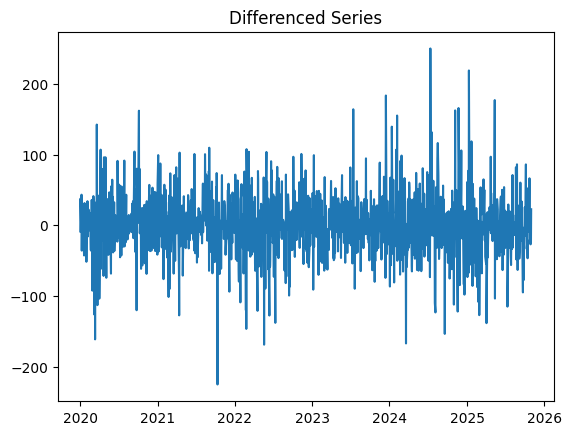

In [94]:
data_diff = data['Close'].diff().dropna()
plt.plot(data_diff)
plt.title('Differenced Series')
plt.show()


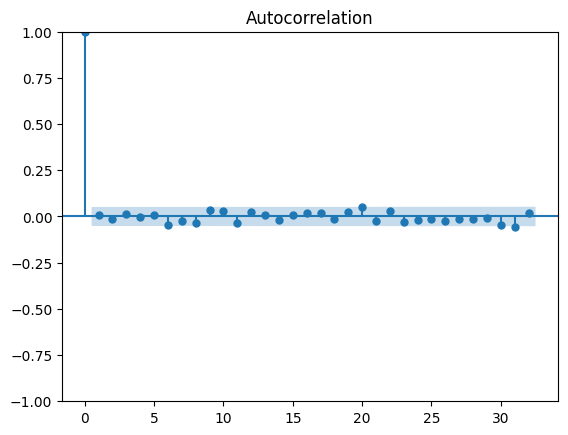

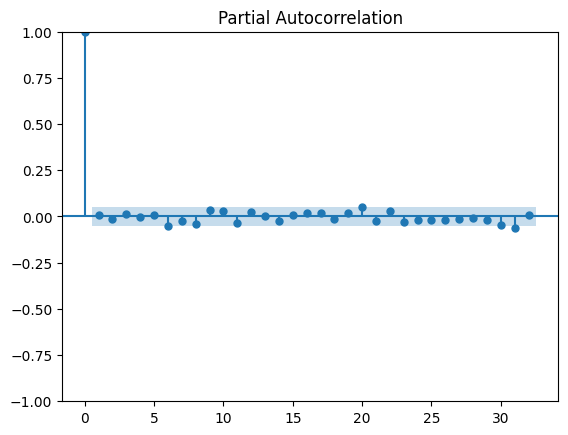

In [95]:
plot_acf(data_diff)
plot_pacf(data_diff)
plt.show()


In [96]:
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 1446
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7499.249
Date:                Sun, 09 Nov 2025   AIC                          15010.498
Time:                        18:22:22   BIC                          15042.153
Sample:                             0   HQIC                         15022.312
                               - 1446                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0060      0.025      0.244      0.807      -0.042       0.055
ar.L2         -0.0128      0.024     -0.534      0.593      -0.060       0.034
ar.L3          0.0124      0.024      0.517      0.6

<script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
<script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>

<center><h3>SARIMAX(5,1,0) Model Interpretation for TCS.NS</h3></center>

<center><h4>📊 Model Summary:</h4></center>

- <strong>Model</strong>: ARIMA(5, 1, 0) - 5 AR terms, 1st order differencing, no MA terms
- <strong>Observations</strong>: 1,446 data points
- <strong>Differencing</strong>: I(1) - Applied first differencing to achieve stationarity

<center><h4>⚠️ Major Concerns - Model Issues:</h4></center>

<strong>1. AR Coefficients All Insignificant:</strong>
- All p-values > 0.05: ar.L1(0.807), ar.L2(0.593), ar.L3(0.605), ar.L4(0.992), ar.L5(0.800)
- <strong>Interpretation</strong>: None of the AR terms are statistically significant ❌

<strong>2. Residual Diagnostics Show Problems:</strong>
- <strong>Jarque-Bera p-value = 0.00</strong>: Residuals are not normally distributed ❌
- <strong>Heteroskedasticity p-value = 0.00</strong>: Residual variance is not constant ❌
- <strong>Kurtosis = 6.15</strong>: Heavy-tailed distribution (>3 indicates fat tails)

<center><h4>✅ Positive Aspects:</h4></center>

- <strong>Ljung-Box Q-test p-value = 1.00</strong>: No autocorrelation in residuals ✅
- <strong>Sigma² (1885.014)</strong>: Error variance is significant (p=0.000)

<center><h4>🎯 Recommendations:</h4></center>

<table border="1">
<tr><th>Issue</th><th>Solution</th></tr>
<tr><td>All AR terms insignificant</td><td>Try simpler model (ARIMA(0,1,0) or ARIMA(1,1,0))</td></tr>
<tr><td>Non-normal residuals</td><td>Consider data transformation (log, Box-Cox)</td></tr>
<tr><td>Heteroskedasticity</td><td>Use GARCH model for volatility modeling</td></tr>
<tr><td>Heavy tails</td><td>Consider Student's t-distribution instead of normal</td></tr>
</table>

<center><h4>🔍 Final Assessment:</h4></center>

<strong>This model is NOT adequate</strong> for forecasting because:
1. No meaningful AR structure captured
2. Residual assumptions violated
3. Model is likely overparameterized

<strong>Next steps:</strong> Simplify model, check if differencing is appropriate, or explore other model families.

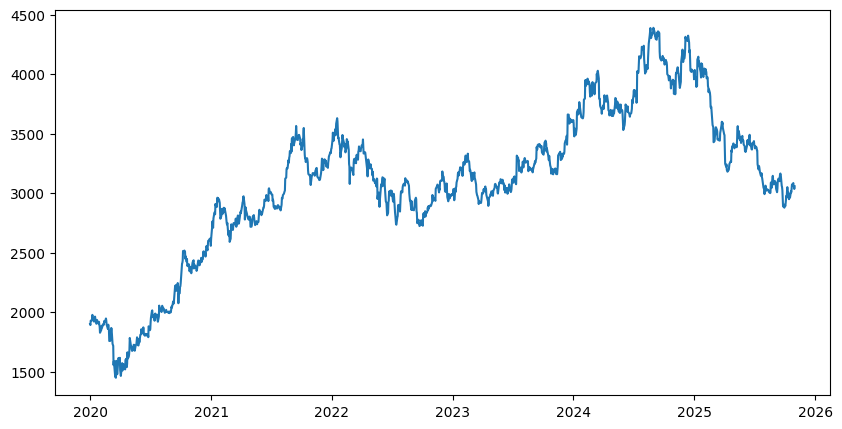

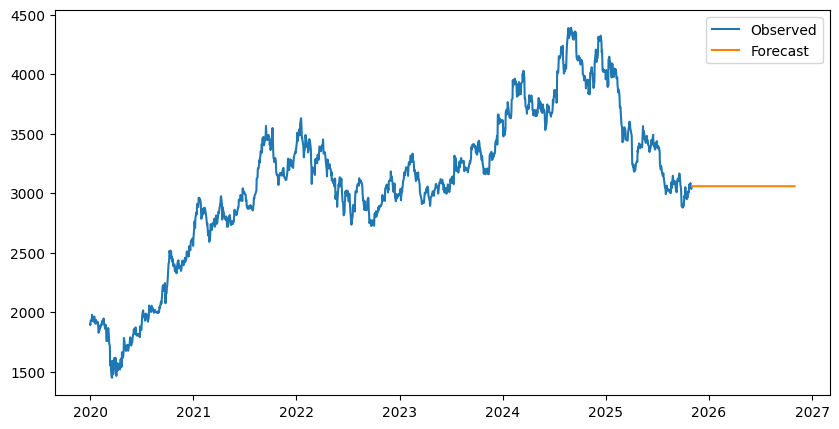

In [100]:
mforecast = model_fit.forecast(steps=365)
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Observed')
plt.plot(pd.date_range(data.index[-1], periods=366, freq='D')[1:], mforecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
import yfinance as yf
import datetime as dt
import pandas as pd

stocks = ['TCS.NS', 'INFY.NS', 'RELIANCE.NS']
end = dt.date.today()
start = end - dt.timedelta(days=365)

for ticker in stocks:
    df = yf.download(ticker, start=start, end=end)
    df.to_csv(f'{ticker}_data.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
Reliance = pd.read_csv('RELIANCE.NS_data.csv')

In [ ]:
print(Reliance.head())

        Price               Close                High                 Low  \
0      Ticker         RELIANCE.NS         RELIANCE.NS         RELIANCE.NS   
1        Date                 NaN                 NaN                 NaN   
2  2024-11-11  1267.6370849609375   1280.884225507143  1261.9598084895413   
3  2024-11-12  1269.1810302734375  1284.1712099692156  1262.4578817905294   
4  2024-11-13     1247.0693359375  1270.3761523895544  1244.5294313213271   

                 Open       Volume  
0         RELIANCE.NS  RELIANCE.NS  
1                 NaN          NaN  
2  1273.8622221377802      9056552  
3  1270.4759075040322     10671091  
4   1265.196886863478     14633633  


[*********************100%***********************]  1 of 1 completed


17:44:31 - cmdstanpy - INFO - Chain [1] start processing
17:44:31 - cmdstanpy - INFO - Chain [1] done processing


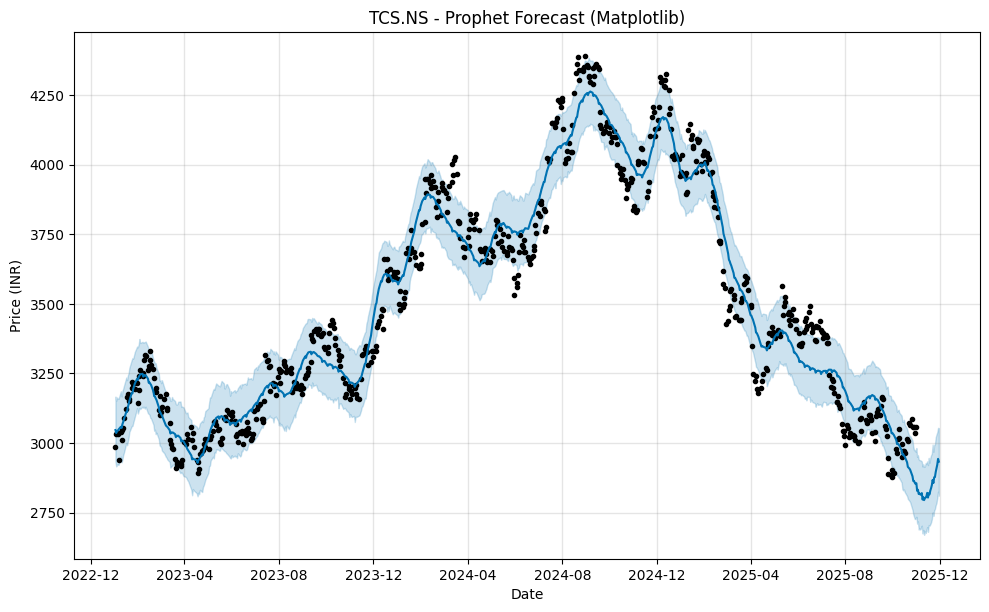

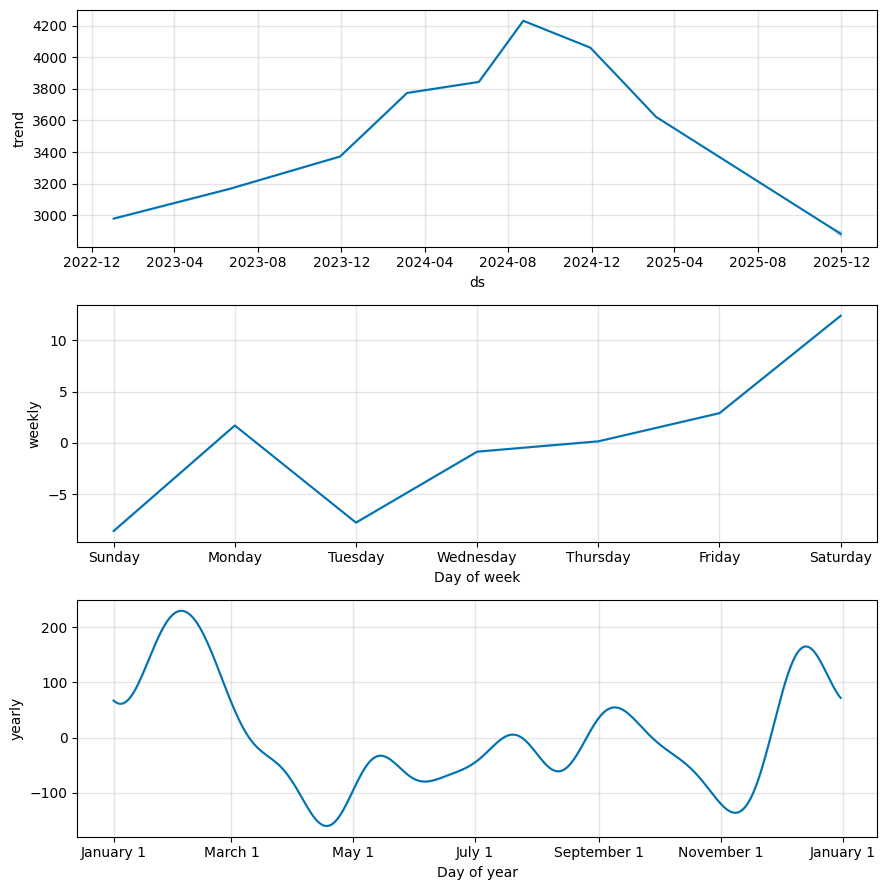

In [ ]:
# ✅ Prophet Forecast with Matplotlib Plot
from prophet import Prophet
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# -------------------------------
# Download and clean stock data
# -------------------------------
data = yf.download("TCS.NS", start="2023-01-01", end="2025-11-01")
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
close_col = [col for col in data.columns if 'Close' in col][0]

df = data[[close_col]].reset_index().rename(columns={'Date': 'ds', close_col: 'y'})
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df = df.dropna()

# -------------------------------
# Fit Prophet model
# -------------------------------
m = Prophet()
m.fit(df)

# -------------------------------
# Forecast next 30 days
# -------------------------------
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

# -------------------------------
# Plot forecast using Matplotlib
# -------------------------------
fig1 = m.plot(forecast, xlabel="Date", ylabel="Price (INR)")
plt.title("TCS.NS - Prophet Forecast (Matplotlib)")
plt.grid(True)
plt.show()

# -------------------------------
# Plot forecast components
# -------------------------------
fig2 = m.plot_components(forecast)
plt.show()


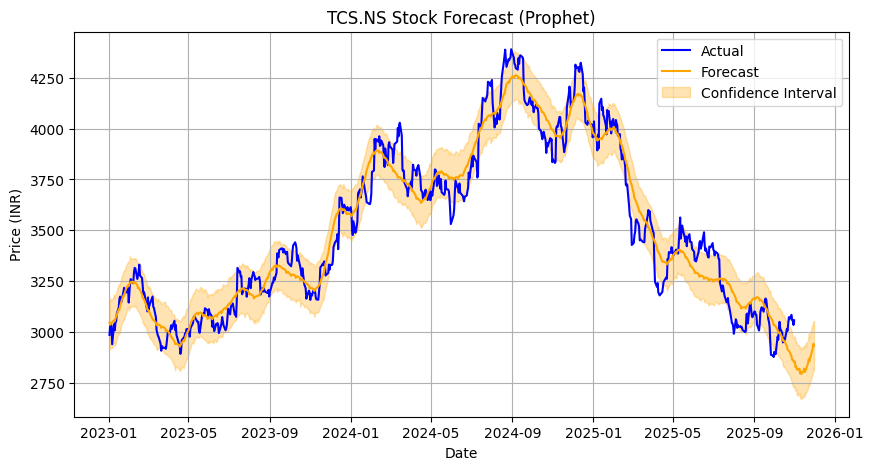

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='orange', alpha=0.3, label='Confidence Interval'
)
plt.title('TCS.NS Stock Forecast (Prophet)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn-v0_8-darkgrid')

# Download Apple Stock Data
data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')

# Use monthly closing price for smoother decomposition
monthly_data = data['Close'].resample('M').mean()
monthly_data.head()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-01-31,75.331903
2020-02-29,75.315935
2020-03-31,63.534161
2020-04-30,65.941006
2020-05-31,75.197802


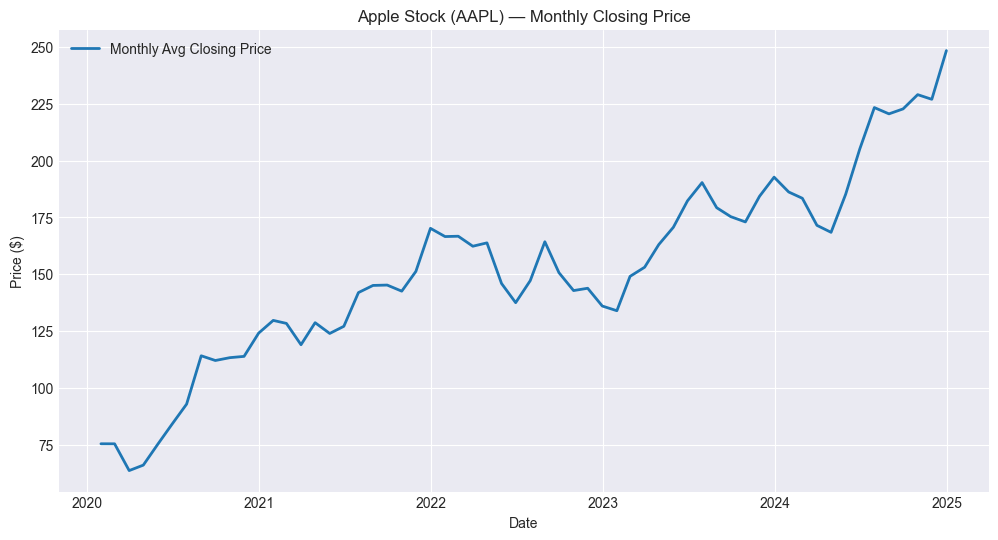

In [102]:
plt.figure(figsize=(12,6))
plt.plot(monthly_data, label='Monthly Avg Closing Price', linewidth=2)
plt.title('Apple Stock (AAPL) — Monthly Closing Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


## ⚙️ Seasonal Decomposition using Moving Average

The function `seasonal_decompose()` from `statsmodels` helps decompose the series into:
- **Trend**
- **Seasonal**
- **Residual**

We can choose:
- `model='additive'` (default)
- `model='multiplicative'`

For financial data like stock prices, **multiplicative decomposition** often works better when the seasonal effect scales with trend.


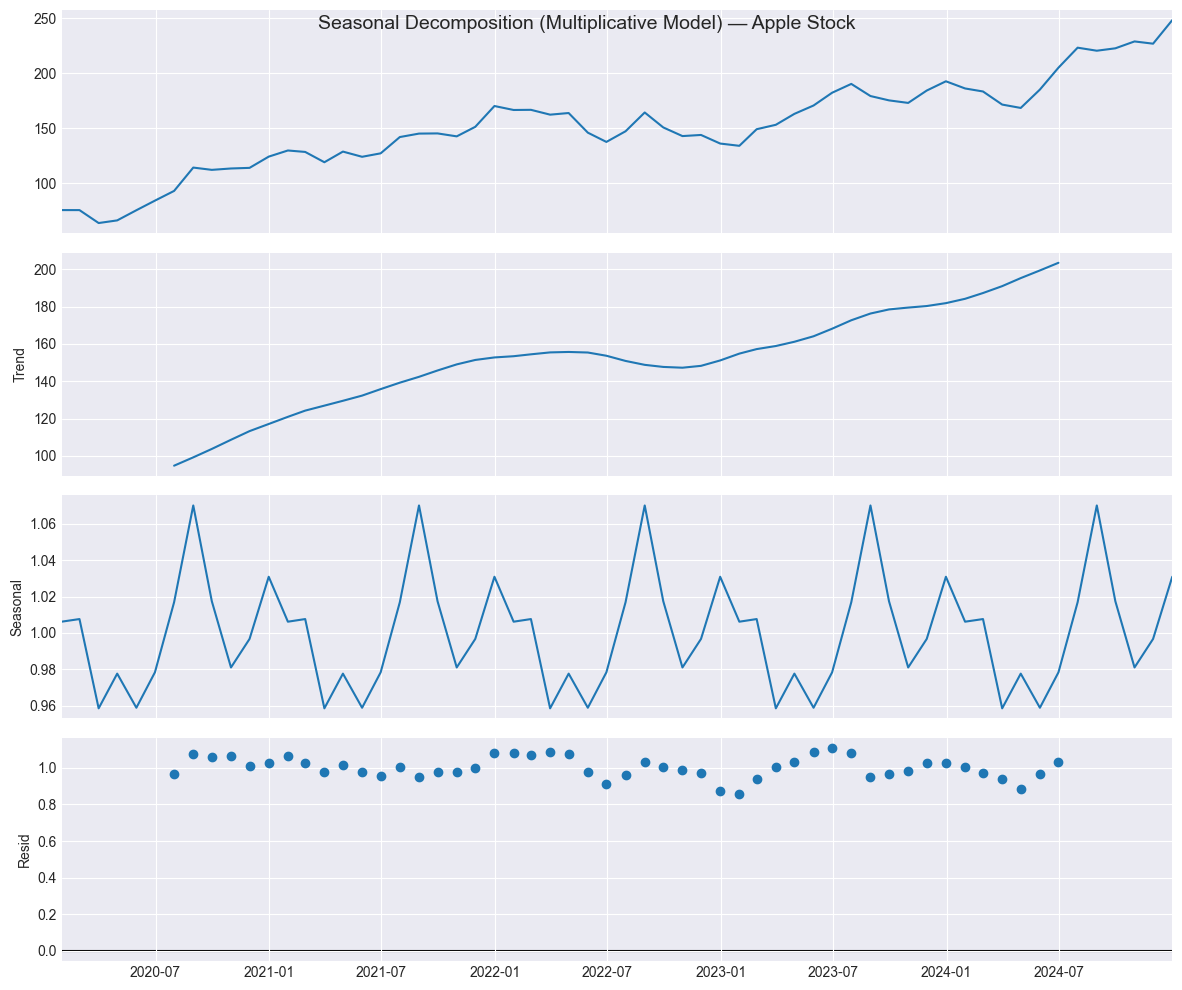

In [103]:
# Perform decomposition (multiplicative)
decomposition = seasonal_decompose(monthly_data, model='multiplicative', period=12)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.rcParams.update({'figure.figsize': (12,10)})
decomposition.plot()
plt.suptitle('Seasonal Decomposition (Multiplicative Model) — Apple Stock', fontsize=14)
plt.show()


## 🧩 Interpreting the Components

### 🔹 1. Trend Component
- Shows the **long-term direction** of the stock price.
- Computed via moving averages.
- Apple’s stock generally shows a **rising trend** from 2020–2024, with some corrections.

### 🔹 2. Seasonal Component
- Shows **repeating patterns** across time (e.g., yearly cycles).
- For financial markets, seasonal patterns can appear due to:
  - End-of-quarter reporting
  - Year-end portfolio rebalancing
  - Investor sentiment (holiday season effect)

### 🔹 3. Residual (Noise)
- Represents the **unexplained randomness** or irregular fluctuations.
- Ideally, residuals should appear as random noise around zero — if not, there may be hidden structure in the data.


In [109]:
import numpy as np

# Drop NaN values (from edges of moving averages)
valid_idx = (~trend.isna()) & (~seasonal.isna()) & (~residual.isna())

# Convert to NumPy arrays to ensure scalar variance output
trend_var = np.var(trend[valid_idx].values)
seasonal_var = np.var(seasonal[valid_idx].values)
residual_var = np.var(residual[valid_idx].values)
total_var = np.var(monthly_data[valid_idx].values)

# Print as formatted floats
print(f"Variance due to Trend: {(trend_var / total_var) * 100:.2f}%")
print(f"Variance due to Seasonality: {(seasonal_var / total_var) * 100:.2f}%")
print(f"Variance due to Residuals: {(residual_var / total_var) * 100:.2f}%")


Variance due to Trend: 104.76%
Variance due to Seasonality: 0.00%
Variance due to Residuals: 0.00%


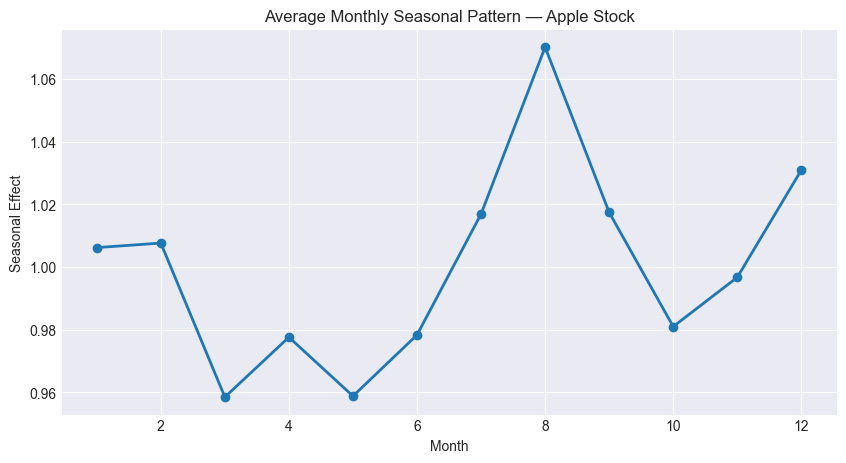

In [105]:
# Plot monthly seasonal pattern
seasonal.index = monthly_data.index  # align indices
monthly_pattern = seasonal.groupby(seasonal.index.month).mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_pattern, marker='o', linewidth=2)
plt.title('Average Monthly Seasonal Pattern — Apple Stock')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect')
plt.grid(True)
plt.show()


## 🧮 Additive vs Multiplicative Decomposition

| Model Type | Formula | Best When | Example |
|-------------|----------|-----------|----------|
| **Additive** | \( Y_t = T_t + S_t + R_t \) | Seasonal amplitude is constant | Temperature over time |
| **Multiplicative** | \( Y_t = T_t × S_t × R_t \) | Seasonal amplitude grows/shrinks with trend | Stock prices, sales |

For Apple stock, multiplicative decomposition fits better since
fluctuations tend to **increase as price level rises**.


# ✅ Summary — Seasonal Decomposition Insights

From the decomposition analysis, we observed:

1. **Trend** — A strong upward long-term trend from 2020–2024.
2. **Seasonality** — Repeating patterns on a yearly basis, though weaker in stocks compared to retail or temperature data.
3. **Residuals** — Random variations due to market events, news, or volatility.

---

### Next Steps:
- Use **Holt-Winters Triple Exponential Smoothing** to forecast while incorporating both trend and seasonality.
- Try **STL Decomposition (Seasonal and Trend decomposition using Loess)** for more flexible trend estimation.


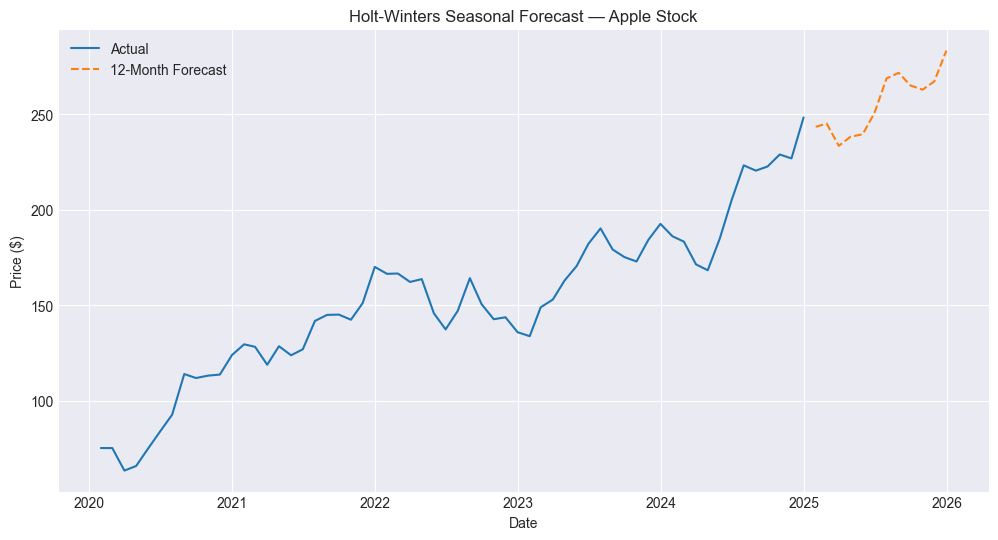

In [107]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model (additive seasonality)
hw_model = ExponentialSmoothing(monthly_data, trend='add', seasonal='mul', seasonal_periods=12).fit()

forecast = hw_model.forecast(12)

plt.figure(figsize=(12,6))
plt.plot(monthly_data, label='Actual')
plt.plot(forecast, label='12-Month Forecast', linestyle='--')
plt.title('Holt-Winters Seasonal Forecast — Apple Stock')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


| Component            | Meaning             | Captures               | Determined By    |
| -------------------- | ------------------- | ---------------------- | ---------------- |
| **Trend (Tₜ)**       | Long-term direction | Overall growth/decline | Moving average   |
| **Seasonality (Sₜ)** | Repeating pattern   | Periodic behavior      | Periodic average |
| **Residual (Rₜ)**    | Random noise        | Unexplained variance   | Remaining error  |
